<a href="https://colab.research.google.com/github/svhenrique/semana-do-python/blob/master/aula3/Resposta_Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# bibliotecas
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
import numpy as np

In [11]:
# acessar drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [12]:
df = pd.read_csv("/content/drive/My Drive/dataset/advertising.csv")
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

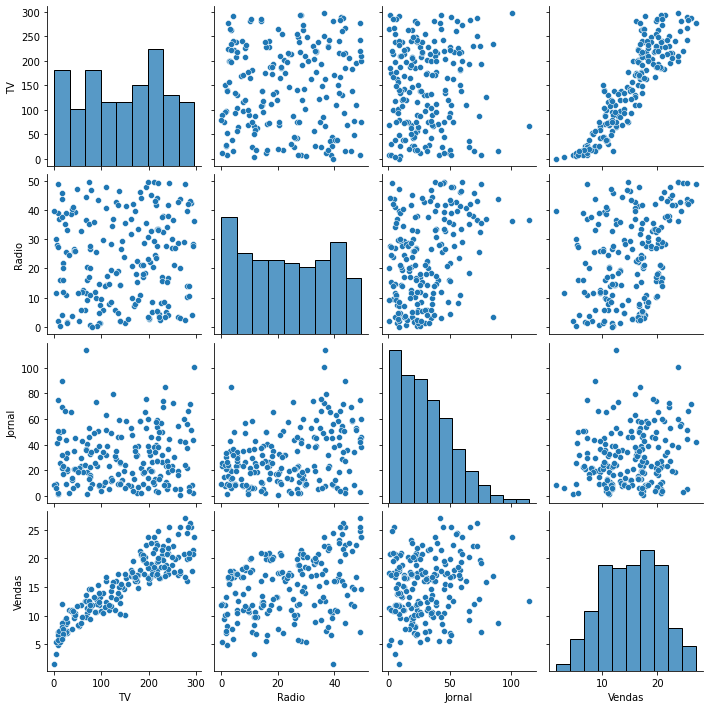

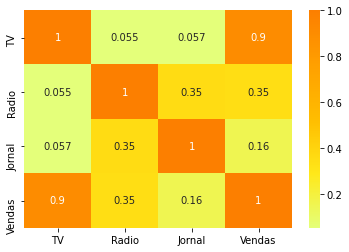

In [13]:
sns.pairplot(df)
plt.show()
sns.heatmap(df.corr(), cmap ='Wistia', annot =True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [14]:
x = df.drop('Vendas', axis=1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [15]:
# treinando modelos
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [16]:
# testando modelos
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
print(f"MSE da Regressão Linear: {mse_lin}")
r2_rf= metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")
print(f"MSE do Random Forest: {mse_rf}")

R² da Regressão Linear: 0.9071151423684272
MSE da Regressão Linear: 2.3706599712256584
R² do Random Forest: 0.9626153469413342
MSE do Random Forest: 0.9541523000000017


#### Visualização Gráfica das Previsões

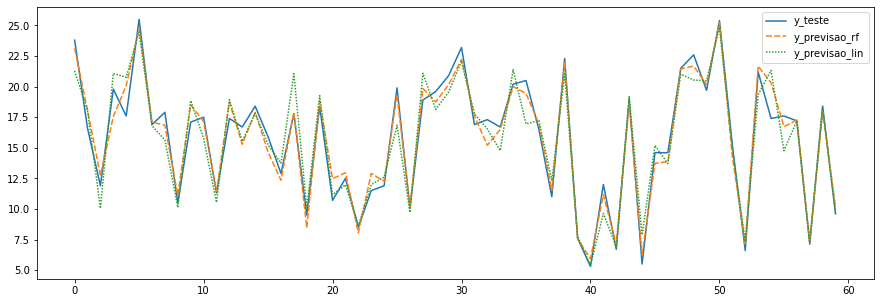

,y_teste,y_previsao_rf,y_previsao_lin
0,23.8,23.132,21.288161
1,16.6,18.087,18.042132
2,11.9,12.735,10.059590
3,19.8,17.552,21.082241
4,17.6,20.093,20.764760
5,25.5,24.766,24.471874
6,16.9,17.102,16.806436
7,17.9,16.842,15.628857
8,10.5,11.110,10.124799
9,17.1,18.510,18.846019


In [17]:
df_resultado = pd.DataFrame()
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

#### Qual a importância de cada variável para as vendas?

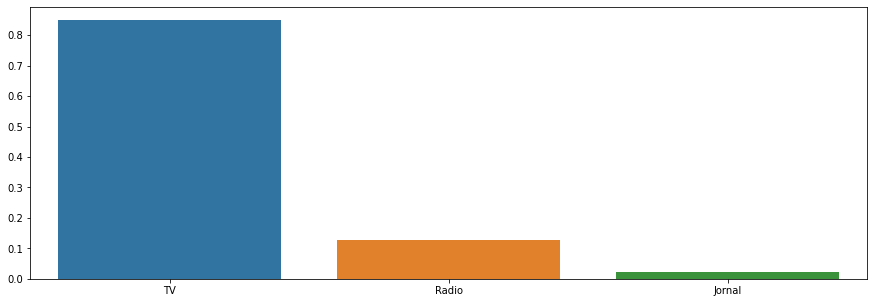

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()

#### Será que estamos investindo certo?

In [19]:
print(df[["Radio", "Jornal"]].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64
